<a href="https://colab.research.google.com/github/IvanTolaba/PID/blob/main/TP2_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagen original
ingrese un número a para aY'
0.5
ingrese un número b para bI y bQ
0.001


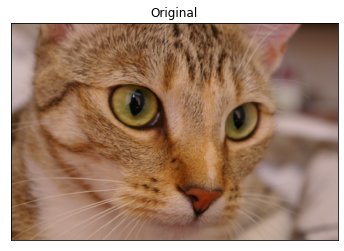

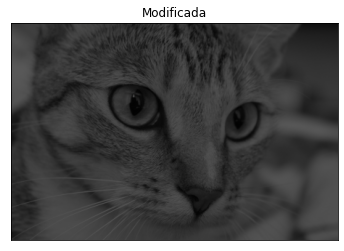

In [ ]:
# Definición de funciones 

def rgb_to_yiq(rgb):
  import numpy as np 
  yiq=np.zeros(rgb.shape) 
  yiq[:,:,0]=0.229*rgb[:,:,0]+0.587*rgb[:,:,1]+0.114*rgb[:,:,2]
  yiq[:,:,1]=0.595716*rgb[:,:,0]-0.274453*rgb[:,:,1]-0.321263*rgb[:,:,2]
  yiq[:,:,2]=0.211456*rgb[:,:,0]-0.522591*rgb[:,:,1]+0.311135*rgb[:,:,2]
  return yiq

def yiq_prima(yiq):
  #***********************************
  #Constante "a" para aY'
  bandera=True
  while bandera==True:
    print("ingrese un número a para aY'")
    a = input()
    a=float(a)
    y0=yiq[:,:,0]
    y0=y0*a
    y0=y0>1                   #si hay alguno >1 dara true
    bandera=y0.any()          #si hay alguno >1 bandera= True
    if bandera==False:
      yiq[:,:,0]=yiq[:,:,0]*a
      bandera=False
  #***********************************
  #***********************************
  #Constante "b" para bI y bQ
  bandera2=True
  bandera3=True
  while(bandera2==True)or(bandera3==True) :    #Si alguna es True bI ,bQ están fuera de rango
    print("ingrese un número b para bI y bQ")
    b = input()
    b=float(b)
    # I
    y1=yiq[:,:,1]
    y1=y1*b
    y1a=y1<=-0.5957           #matriz booleana
    y1a=y1>=0.5957            #si esta fuera de rango alguno valdra true
    y1aa=y1a.any()
    y1ab=y1a.any()
    bandera2=y1aa or y1ab     #si alguno es True I' esta fuera de rango

    #Q
    y2=yiq[:,:,2]
    y2=y2*b
    y2a=y2<=-0.5226          #matriz booleana
    y2a=y2>=0.5226           #si esta fuera de rango alguno valdra true
    y2aa=y2a.any()
    y2ab=y2a.any()
    bandera3=y2aa or y2ab    #si alguno es True esta fuera de rango
  yiq[:,:,1]=y1
  yiq[:,:,2]=y2
  return yiq

def yiq_prima_rgb_prima(yiq):
  import numpy as np 
  rgbp=np.zeros(yiq.shape)
  rgbp[:,:,0]=yiq[:,:,0]+0.9663*yiq[:,:,1]+0.6210*yiq[:,:,2]
  rgbp[:,:,1]=yiq[:,:,0]-0.2721*yiq[:,:,1]-0.6474*yiq[:,:,2]
  rgbp[:,:,2]=yiq[:,:,0]-1.1070*yiq[:,:,1]+1.7046*yiq[:,:,2]
  return rgbp

#*******************************************************
#******************************************************
#***********  PROGRAMA PRINCIPAL  ***********************
#
def main():
  import numpy as np 
  import matplotlib.pyplot as plt
  import imageio
  # abrir y mostrar imagen normalizada
  rgb=imageio.imread('imageio:chelsea.png')/255.  #RGB normalizado [0,1] 
  print('Imagen original')
  plt.figure(0)
  plt.imshow(rgb)
  plt.title('Original')
  plt.xticks([]), plt.yticks([])
  #RGB a YIQ
  yiq=rgb_to_yiq(rgb)
  #YIQ a YIQ'
  #aY',bI'y cQ'
  yiq=yiq_prima(yiq)
  # YIQ' a RGB'
  rgb_prima=yiq_prima_rgb_prima(yiq)
  
  plt.figure(1)
  plt.imshow(rgb_prima)
  plt.imshow(rgb_prima)
  plt.title('Modificada')
  plt.xticks([]), plt.yticks([])


  

if __name__ == '__main__':
  main()